## Group activity for Module 1:  Tracers

**adapted from MATLAB (Andy Thompson) to Python 3 by Ruth Moorman (Oct - 2020)**

Andy Thompson: For this activity you will be carrying out perhaps the most fundamental
and classical approach to understanding Earth's ocean:  mapping and
interpreting the distribution of different water properties.  Here, we
will focus on three tracers: temperature, salinity, and oxygen.  The
first two are conservative tracers, the latter is non-conservative.  Some
of these are active and passive tracers and they do not always have the
same classification in different places.  The data you will analyze is a
hydrographic section through the center of the Atlantic Ocean.

Ruth Moorman: Run this notebook in an environment with the packages xarray, cmocean, gsw, scipy installed. For information on how to set up a customised python 3 environment in the Anaconda Navigator interface, see https://docs.anaconda.com/anaconda/navigator/getting-started/. Note some packages come from the conda-forge channel, so you will need to add this channel to the search space when looking for packages to add to your environment, see https://conda-forge.org/docs/user/introduction.html.

In [1]:
# import some key packages, make sure these are all present in your python environment
import numpy as np
import xarray as xr
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from gsw import SA_from_SP, CT_from_t, sigma0, sigma2
from scipy.io import loadmat
from matplotlib import gridspec
import matplotlib.colors as colors


In [2]:
# load .mat data 
CTD_A11_sorted_mat = loadmat('/Users/ruthmoorman/Documents/MATLAB/ESE102/CTD_A11_sorted.mat')
print(CTD_A11_sorted_mat.keys()) # tells you the variable names to be extracted
# extract matlab variables as simple arrays
lon = CTD_A11_sorted_mat["lon_A11_sort"]
lat = CTD_A11_sorted_mat["lat_A11_sort"]
press = CTD_A11_sorted_mat["press_A11_sort"]
temp = CTD_A11_sorted_mat["temp_A11_sort"]
sal = CTD_A11_sorted_mat["sal_A11_sort"]
oxy = CTD_A11_sorted_mat["oxy_A11_sort"]
press_all = np.arange(1,6141)
# compute conservative temperature and absolute salinity using teos10 gsw functions
SA = SA_from_SP(sal,press,lon,lat)
CT = CT_from_t(SA,temp,press)
sig0 = sigma0(SA,CT)
sig2 = sigma2(SA,CT)
CTD_A11 = xr.Dataset({
                "CT": (["lat", "press"], CT,{"units":"degrees C"}),
                "SA": (["lat", "press"], SA,{"units":"g/kg"}),
                "oxy": (["lat", "press"], oxy,{"units":"µmol/kg"}),
                "sig0": (["lat", "press"], sig0,{"units":"kg/m3"}),
                "sig2": (["lat", "press"], sig2,{"units":"kg/m3"}),
                "pressure": (["lat", "press"], press,{"units":"dbar"})},
                 coords = {"lat":CTD_A11_sorted_mat['lat_A11_sort'][:,0], 
                           "press":np.arange(1,6141),
                           "lon":("lat",CTD_A11_sorted_mat['lon_A11_sort'][:,0])})
CTD_A11 = CTD_A11.transpose() # transposing makes plotting a little cleaner
print(CTD_A11)


dict_keys(['__header__', '__version__', '__globals__', 'lat_A11_sort', 'lon_A11_sort', 'press_A11_sort', 'sal_A11_sort', 'temp_A11_sort', 'oxy_A11_sort'])
<xarray.Dataset>
Dimensions:   (lat: 258, press: 6140)
Coordinates:
  * lat       (lat) float64 -60.01 -59.5 -59.0 -58.5 ... 62.75 63.12 63.22 63.3
  * press     (press) int64 1 2 3 4 5 6 7 ... 6134 6135 6136 6137 6138 6139 6140
    lon       (lat) float64 -30.9 -30.92 -30.92 -30.93 ... -20.0 -20.0 -20.0
Data variables:
    CT        (press, lat) float64 nan nan nan nan nan ... nan nan nan nan nan
    SA        (press, lat) float64 nan nan nan nan nan ... nan nan nan nan nan
    oxy       (press, lat) float64 nan nan nan nan nan ... nan nan nan nan nan
    sig0      (press, lat) float64 nan nan nan nan nan ... nan nan nan nan nan
    sig2      (press, lat) float64 nan nan nan nan nan ... nan nan nan nan nan
    pressure  (press, lat) float64 nan nan nan nan nan ... nan nan nan nan nan


In [3]:
from matplotlib import rc, rcParams
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20) 
rc('axes', labelsize=20)

## Figure 1: hydrographic sections

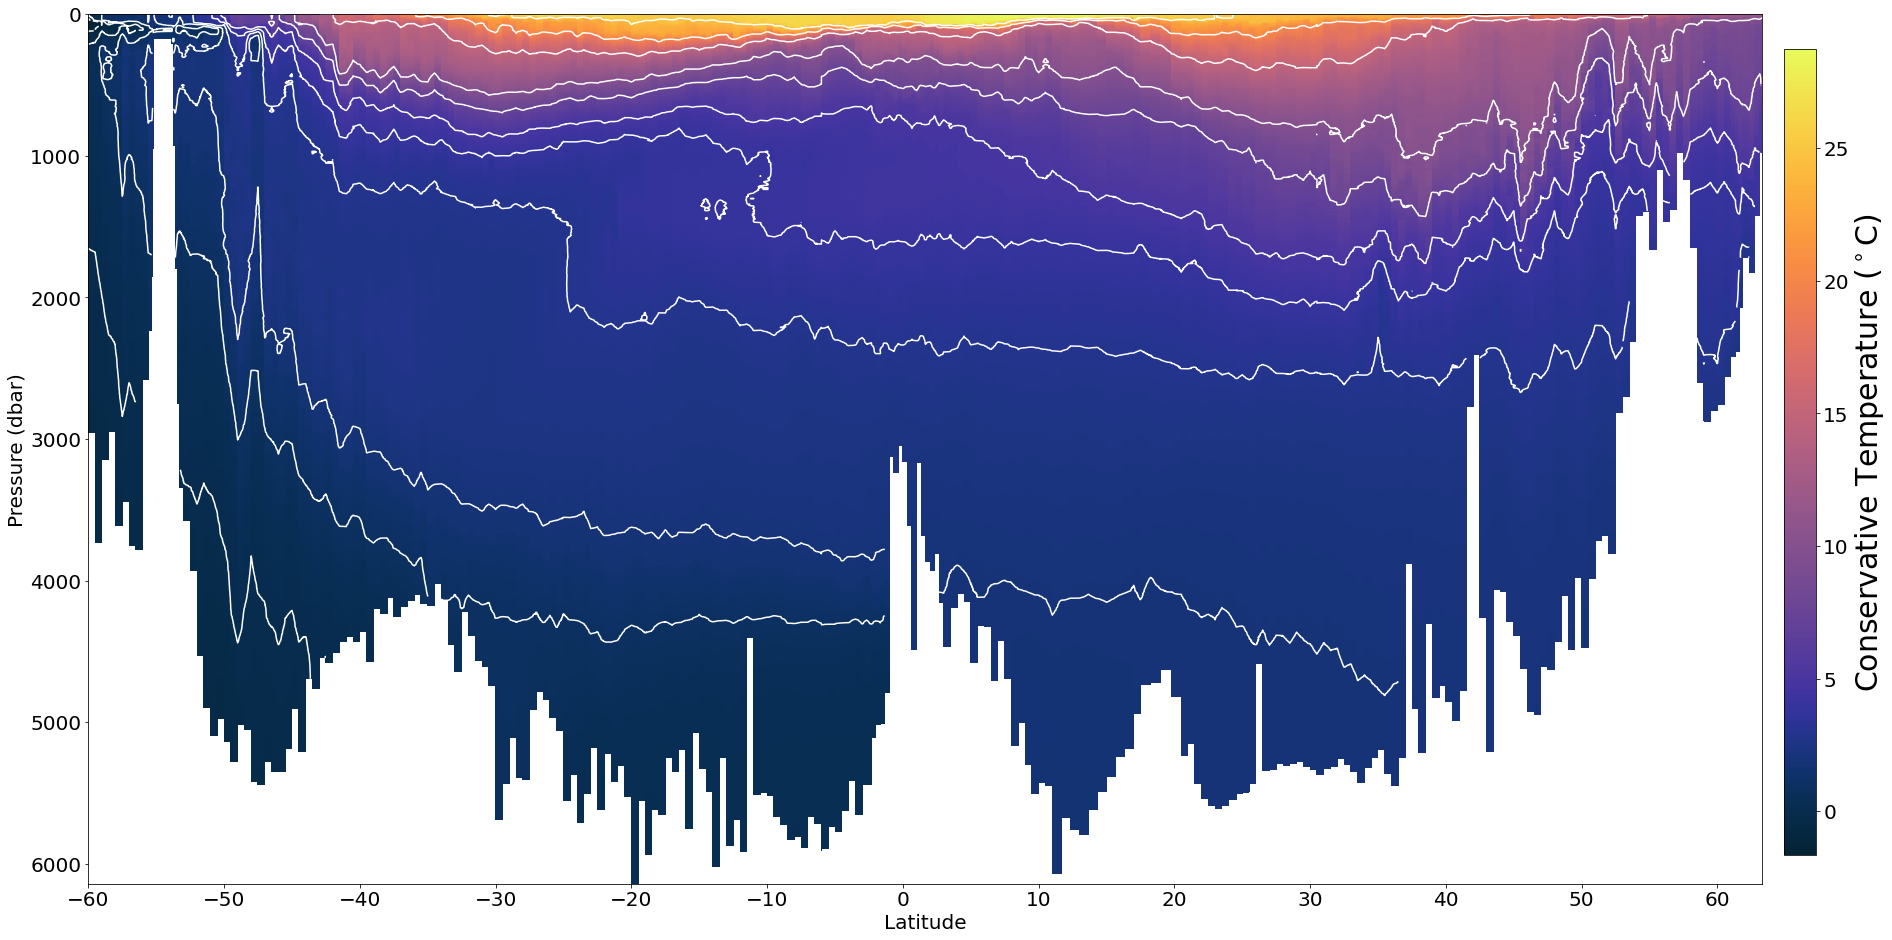

In [4]:
## CONSERVATIVE TEMPERATURE
fig = plt.figure(figsize=[30, 16])
ax = plt.subplot()
cmap = cmo.thermal
t = ax.pcolormesh(CTD_A11.lat, CTD_A11.press,CTD_A11.CT, cmap=cmap)
ax.contour(CTD_A11.lat, CTD_A11.press,CTD_A11.CT, levels=np.append(np.append(np.arange(-1,6),7.5),np.arange(10,30,5)), colors='w')
ax.set_ylim([6140,0])
ax.set_xticks(np.arange(-60,70,10))
ax.set_ylabel('Pressure (dbar)')
ax.set_xlabel('Latitude')
cax = fig.add_axes([0.91, 0.15, 0.015, 0.7])
cbar=plt.colorbar(t,cax = cax,orientation='vertical',shrink = 0.5)
cbar.set_label(r'Conservative Temperature ($^\circ$C)', fontsize = 30)
plt.show()

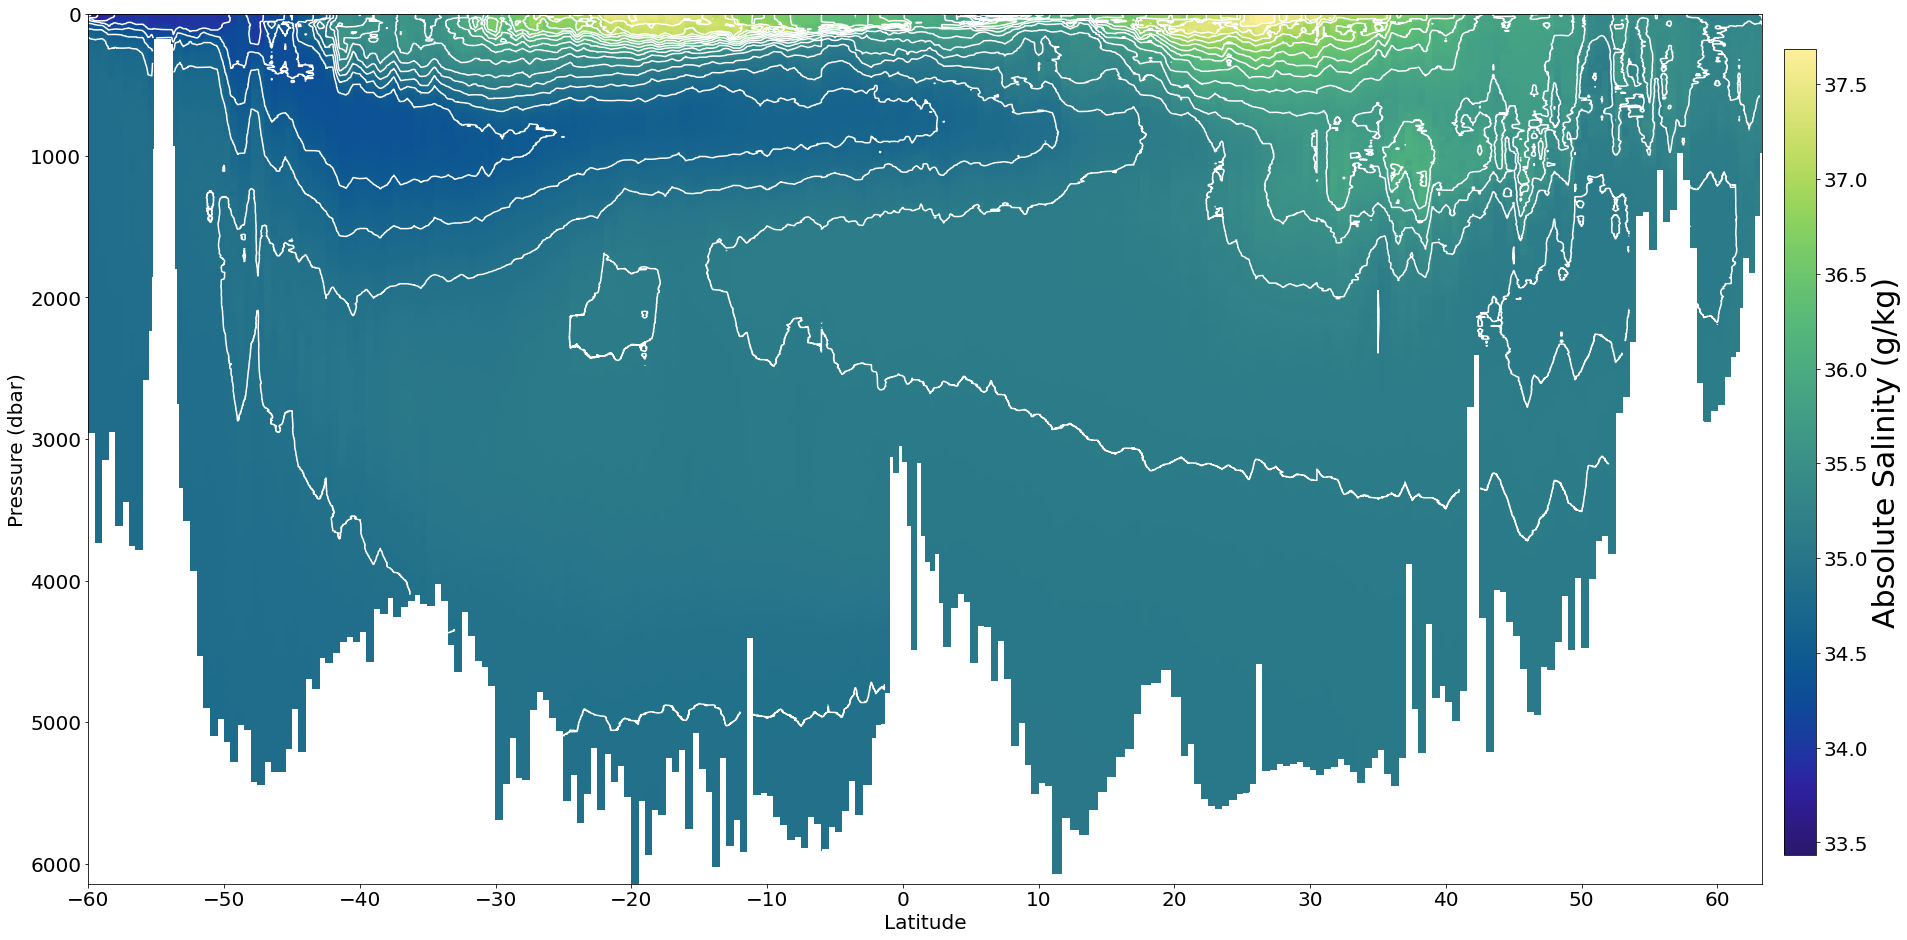

In [5]:
## ABSOLUTE SALINITY
fig = plt.figure(figsize=[30, 16])
ax = plt.subplot()
cmap = cmo.haline
s = ax.pcolormesh(CTD_A11.lat, CTD_A11.press,CTD_A11.SA, cmap=cmap)
ax.contour(CTD_A11.lat, CTD_A11.press,CTD_A11.SA, levels=np.arange(33.5,37.7,0.2), colors='w')
ax.set_ylim([6140,0])
ax.set_xticks(np.arange(-60,70,10))
ax.set_ylabel('Pressure (dbar)')
ax.set_xlabel('Latitude')
cax = fig.add_axes([0.91, 0.15, 0.015, 0.7])
cbar=plt.colorbar(s,cax = cax,orientation='vertical',shrink = 0.5)
cbar.set_label(r'Absolute Salinity (g/kg)', fontsize = 30)
plt.show()

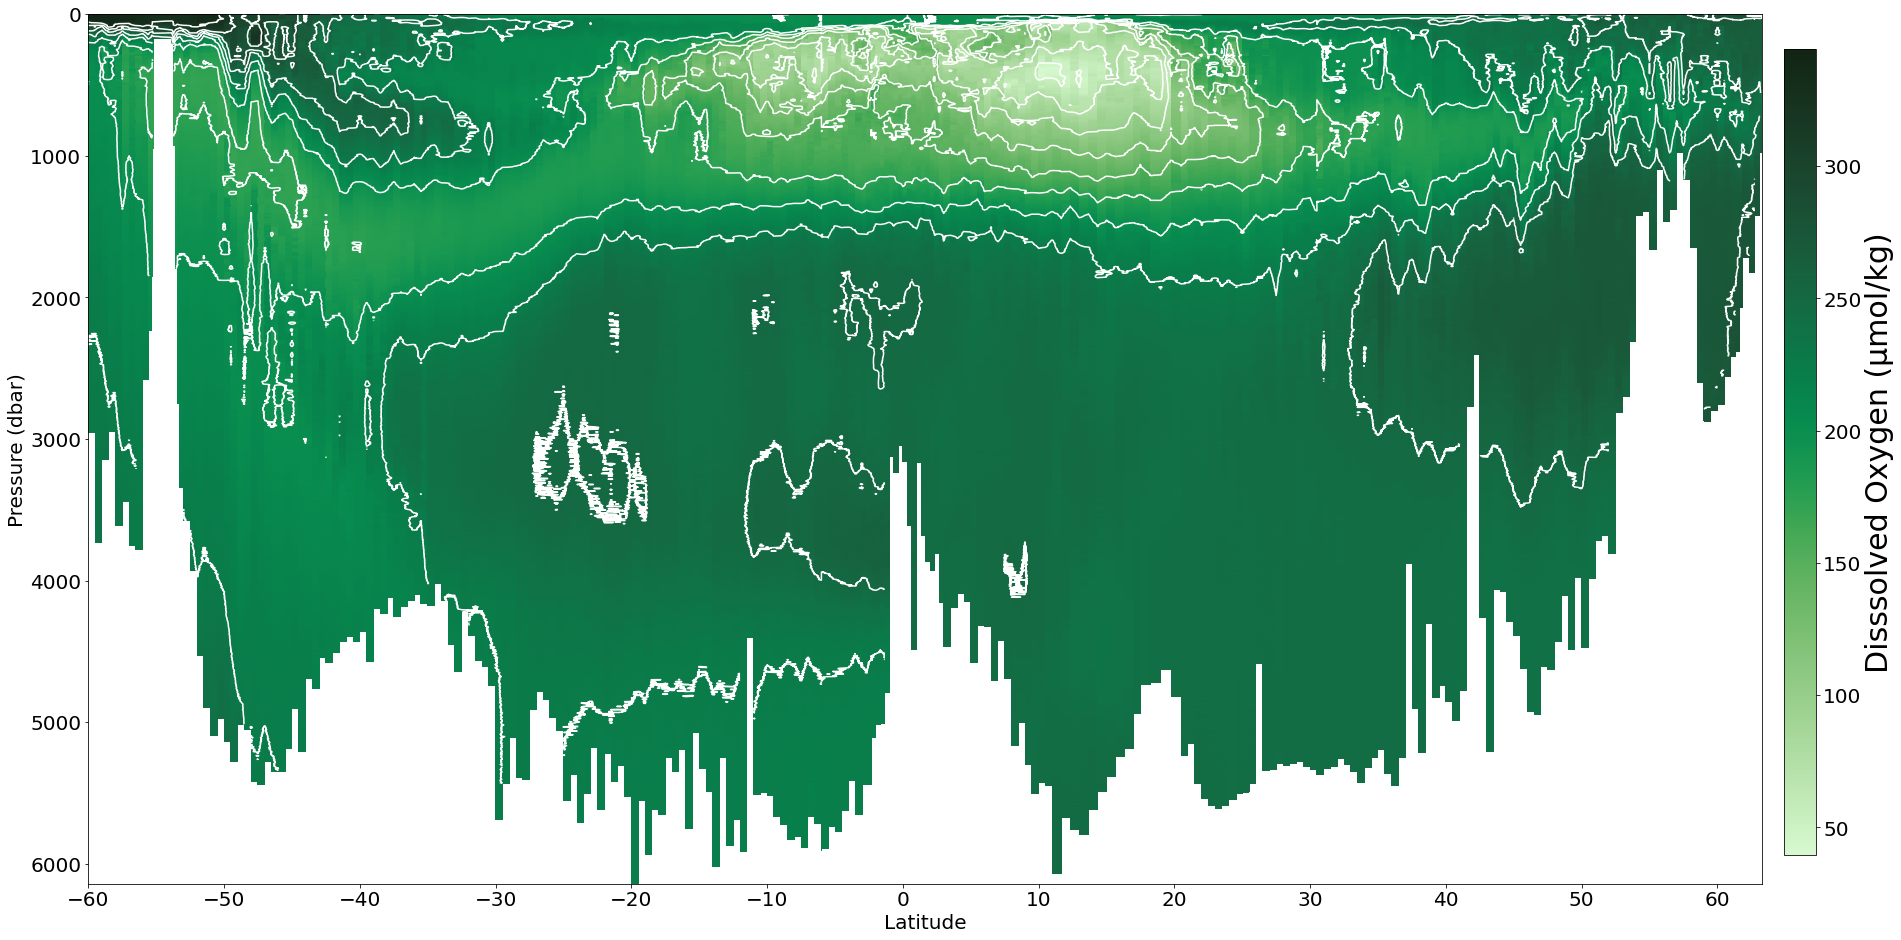

In [6]:
## DISSOLVED OXYGEN
fig = plt.figure(figsize=[30, 16])
ax = plt.subplot()
cmap = cmo.algae
s = ax.pcolormesh(CTD_A11.lat, CTD_A11.press,CTD_A11.oxy, cmap=cmap)
ax.contour(CTD_A11.lat, CTD_A11.press,CTD_A11.oxy, levels=np.arange(50,400,25), colors='w')
ax.set_ylim([6140,0])
ax.set_xticks(np.arange(-60,70,10))
ax.set_ylabel('Pressure (dbar)')
ax.set_xlabel('Latitude')
cax = fig.add_axes([0.91, 0.15, 0.015, 0.7])
cbar=plt.colorbar(s,cax = cax,orientation='vertical',shrink = 0.5)
cbar.set_label(r'Disssolved Oxygen (µmol/kg)', fontsize = 30)
plt.show()

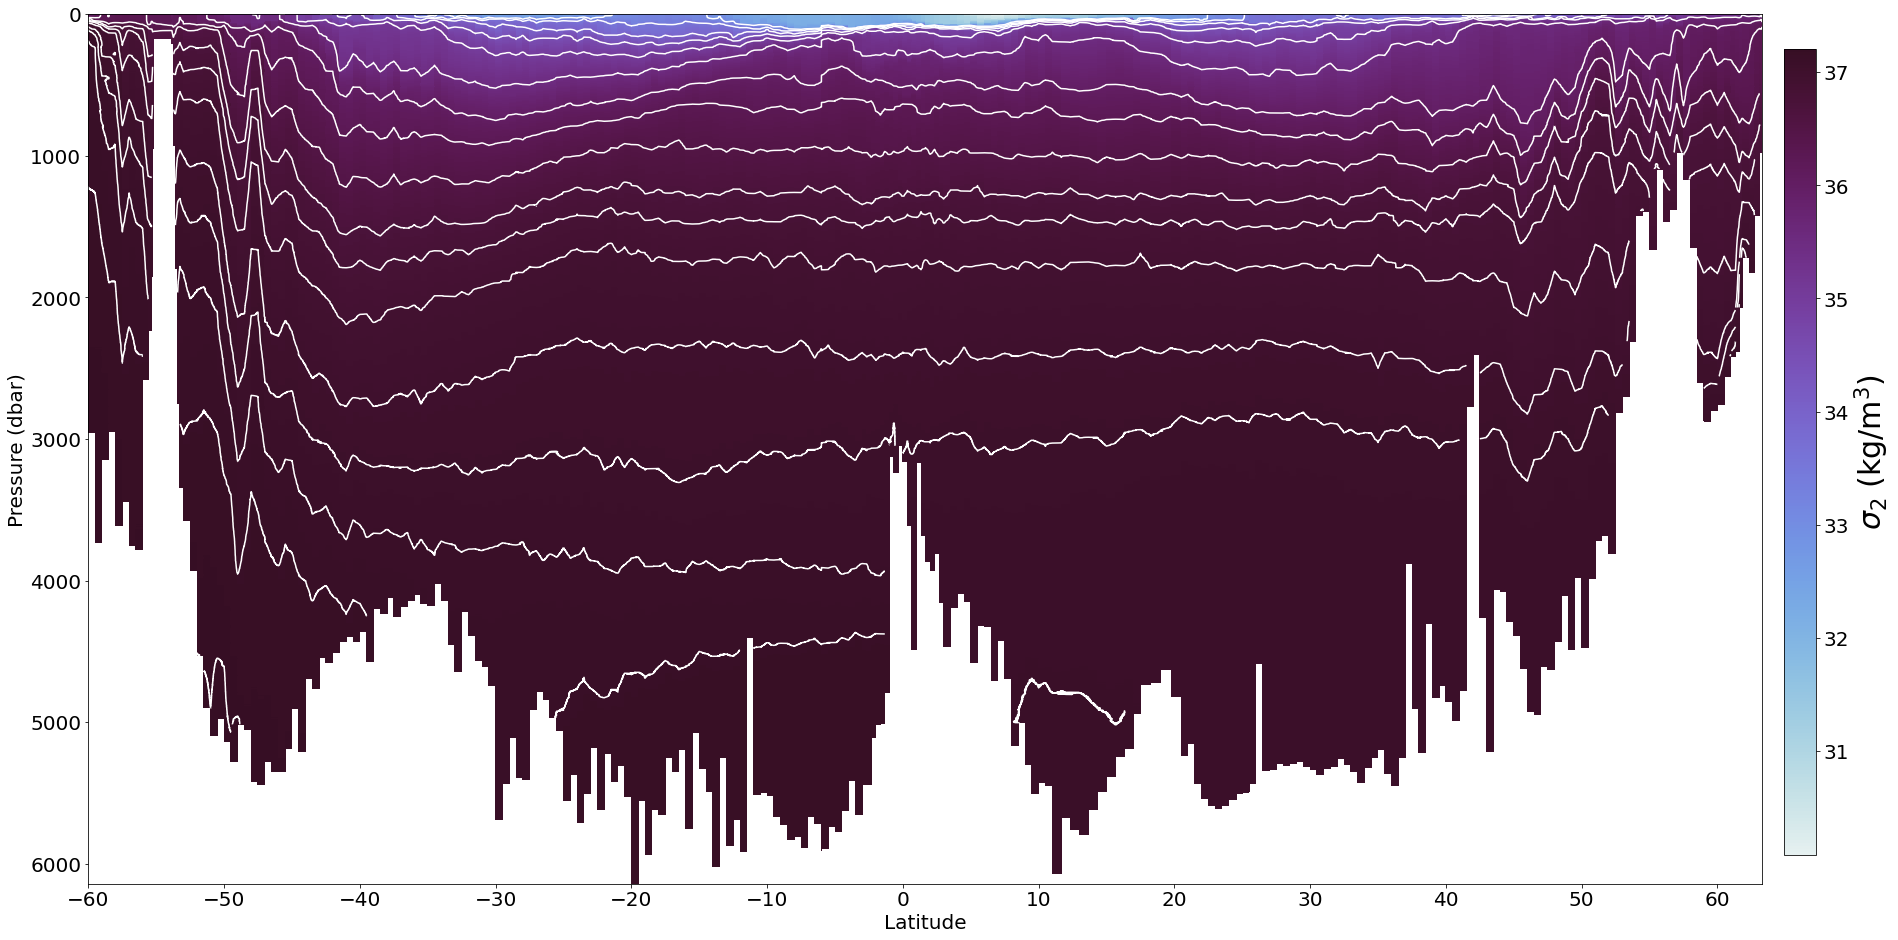

In [7]:
## SIGMA 2 
fig = plt.figure(figsize=[30, 16])
ax = plt.subplot()
cmap = cmo.dense
s = ax.pcolormesh(CTD_A11.lat, CTD_A11.press,CTD_A11.sig2, cmap=cmap)
ax.contour(CTD_A11.lat, CTD_A11.press,CTD_A11.sig2, levels=np.append(np.append(np.append(np.arange(33,36,0.5),np.arange(36,36.75,0.25)),np.arange(36.7,37.1,0.1)),np.arange(37.05,37.25,0.05)), colors='w')
ax.set_ylim([6140,0])
ax.set_xticks(np.arange(-60,70,10))
ax.set_ylabel('Pressure (dbar)')
ax.set_xlabel('Latitude')
cax = fig.add_axes([0.91, 0.15, 0.015, 0.7])
cbar=plt.colorbar(s,cax = cax,orientation='vertical',shrink = 0.5)
cbar.set_label(r'$\sigma_2$ (kg/m$^{3}$)', fontsize = 30)
plt.show()

## Figure 2: profiles

In [8]:
def plot_profiles(latitude):
    fig = plt.figure(figsize=[30, 16])
    gs = gridspec.GridSpec(1,4)
    gs.update(wspace = 0.1)
    ax0,ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
    ax1.set_yticklabels([])
    ax2.set_yticklabels([])
    ax3.set_yticklabels([])
    profile=CTD_A11.sel(lat=latitude,method='nearest')
    print('Latitude: '+str(profile.lat.values)+', Longitude: '+str(profile.lon.values))
    ax0.plot(profile.CT, profile.press,'b',linewidth = 2)
    ax1.plot(profile.SA, profile.press,'r',linewidth = 2)
    ax2.plot(profile.oxy, profile.press,'g',linewidth = 2)
    ax3.plot(profile.sig2, profile.press,'k',linewidth = 2)
    ax0.set_ylim([6140,0]);ax1.set_ylim([6140,0]);ax2.set_ylim([6140,0]);ax3.set_ylim([6140,0])
    ax0.set_ylabel('Pressure (dbar)')
    ax0.set_xlabel('Temperature ($^\circ$C)')
    ax1.set_xlabel('Salinity (g/kg)')
    ax2.set_xlabel('Oxygen (µmol/kg)')
    ax3.set_xlabel('$\sigma_2$ (kg/m$^3$)')
    plt.show()

Latitude: 15.0, Longitude: -29.0


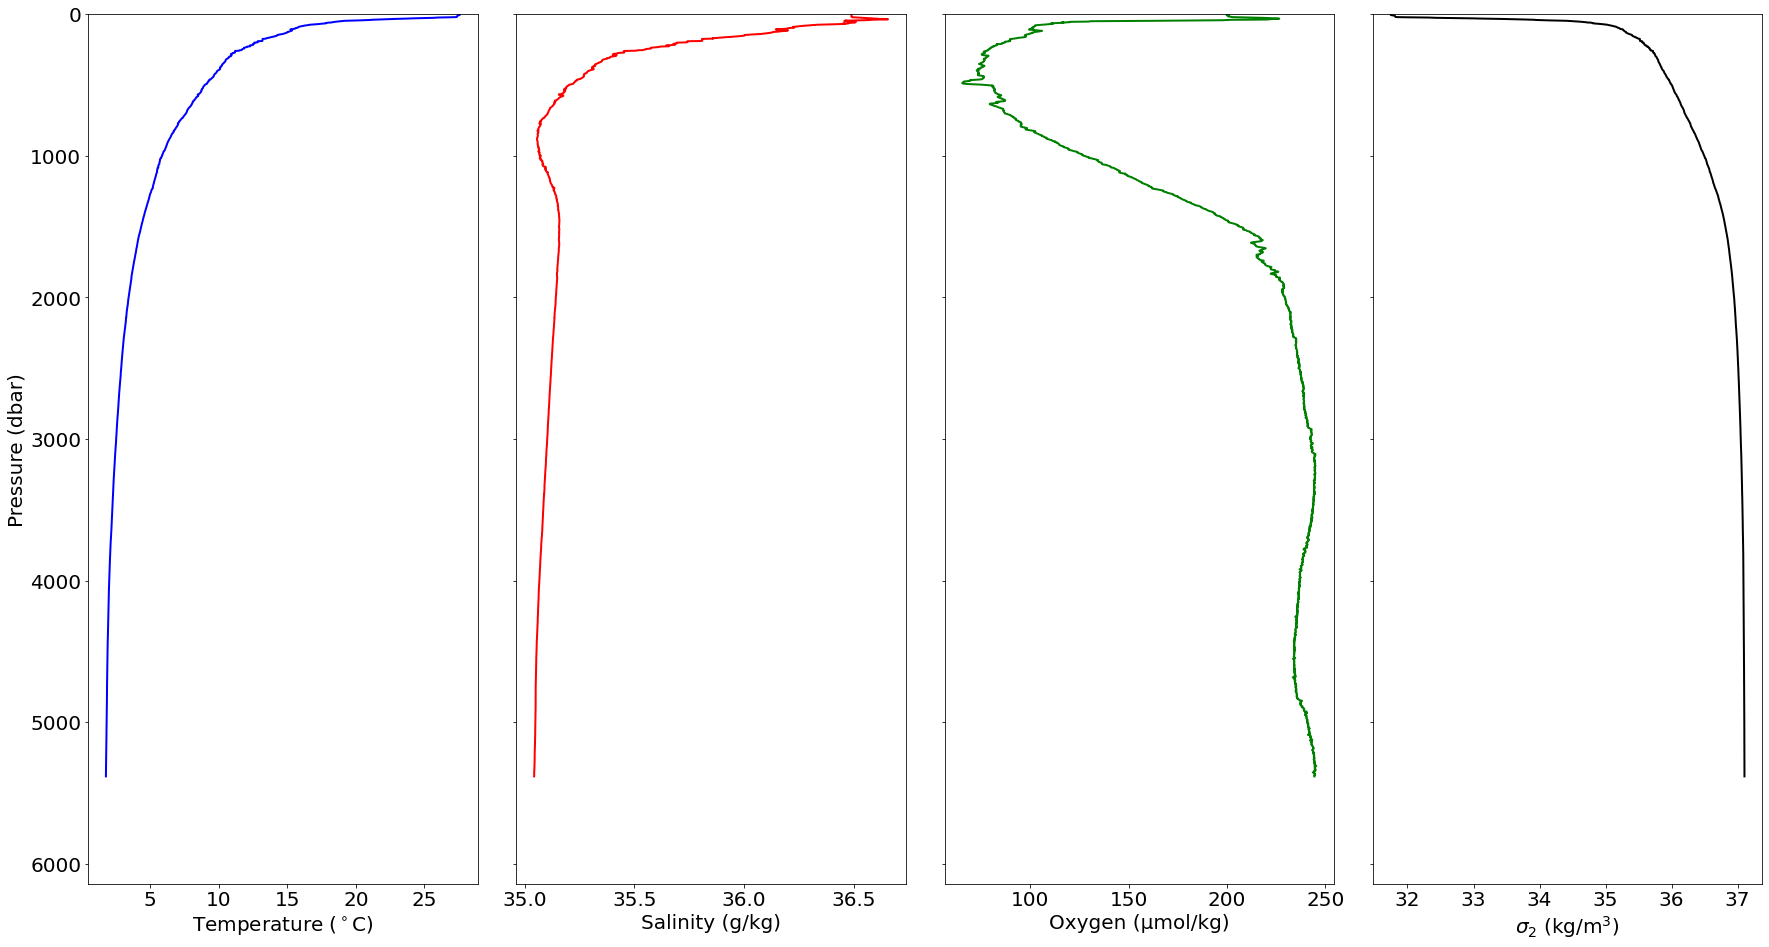

In [9]:
plot_profiles(latitude=15)

## Figure 3: TS Diagram

In [10]:
def plot_TS(latitude):
    """
    latitude must be iterable, e.g. [15], or [15,30,-30]
    """
    fig = plt.figure(figsize=[15, 15])
    ax=plt.subplot()
    tempvec=np.arange(-2,30.1,.1)
    saltvec=np.arange(33,38.05,.05)
    saltmat,tempmat=np.meshgrid(saltvec,tempvec)
    sigma0mat = sigma0(saltmat,tempmat)
    cs=ax.contour(saltvec,tempvec,sigma0mat, levels=np.arange(20,31,1),colors='k',alpha=0.3)
    ax.clabel(cs,fmt='%i',fontsize=25)
    ax.set_xlabel('Absolute Salinity (g/kg)')
    ax.set_ylabel('Conservative Temperature ($^\circ$C)')
    for i in latitude:
        profile=CTD_A11.sel(lat=i,method='nearest')
        ax.plot(profile.SA,profile.CT,linewidth=3, label=str(i)+'$^\circ$N')
    ax.legend(loc=0, fontsize=25)
    plt.show()

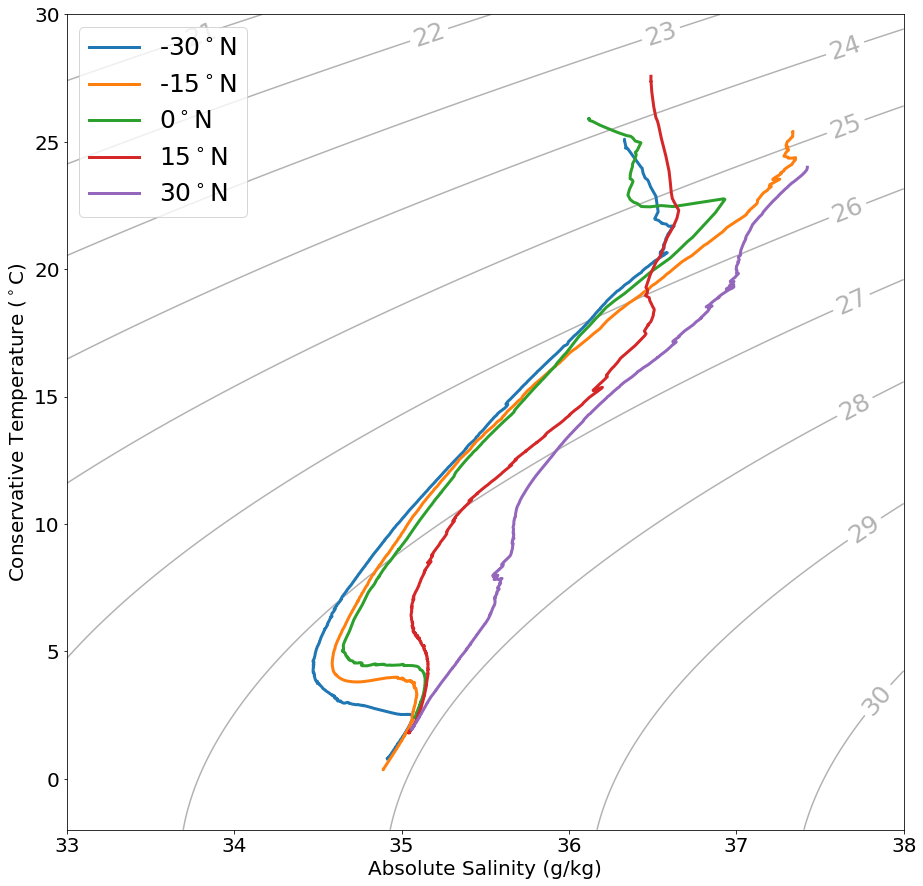

In [11]:
plot_TS(latitude=[-30,-15,0,15,30])

## Figure 4: TS, OS, TO Diagrams

In [12]:
def plot_TSO(latitude):
    """
    latitude must be iterable, e.g. [15], or [15,30,-30]
    """
    fig = plt.figure(figsize=[45, 15])
    gs = gridspec.GridSpec(1,3)
    gs.update(wspace = 0.2)
    ax,ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2])

    tempvec=np.arange(-2,30.1,.1)
    saltvec=np.arange(33,38.05,.05)
    oxyvec=np.arange(0,305,5)
    saltmat,tempmat=np.meshgrid(saltvec,tempvec)
    sigma0mat = sigma0(saltmat,tempmat)
    cs=ax.contour(saltvec,tempvec,sigma0mat, levels=np.arange(20,31,1),colors='k',alpha=0.3)
    ax.clabel(cs,fmt='%i',fontsize=25)
    ax.set_xlabel('Absolute Salinity (g/kg)')
    ax1.set_xlabel('Absolute Salinity (g/kg)')
    ax.set_ylabel('Conservative Temperature ($^\circ$C)')
    ax2.set_ylabel('Conservative Temperature ($^\circ$C)')
    ax1.set_ylabel('Dissolved Oxygen (µmol/kg)')
    ax2.set_xlabel('Dissolved Oxygen (µmol/kg)')

    for i in latitude:
        profile=CTD_A11.sel(lat=i,method='nearest')
        ax.plot(profile.SA,profile.CT,linewidth=3, label=str(i)+'$^\circ$N')
        ax1.plot(profile.SA,profile.oxy,linewidth=3, label=str(i)+'$^\circ$N')
        ax2.plot(profile.oxy,profile.CT,linewidth=3, label=str(i)+'$^\circ$N')

        ax2.legend(bbox_to_anchor=(1.3, 1), fontsize=25)

    # ax1.set_xlim([saltvec[0],saltvec[-1]])
    # ax2.set_ylim([tempvec[0],tempvec[-1]])

    plt.show()

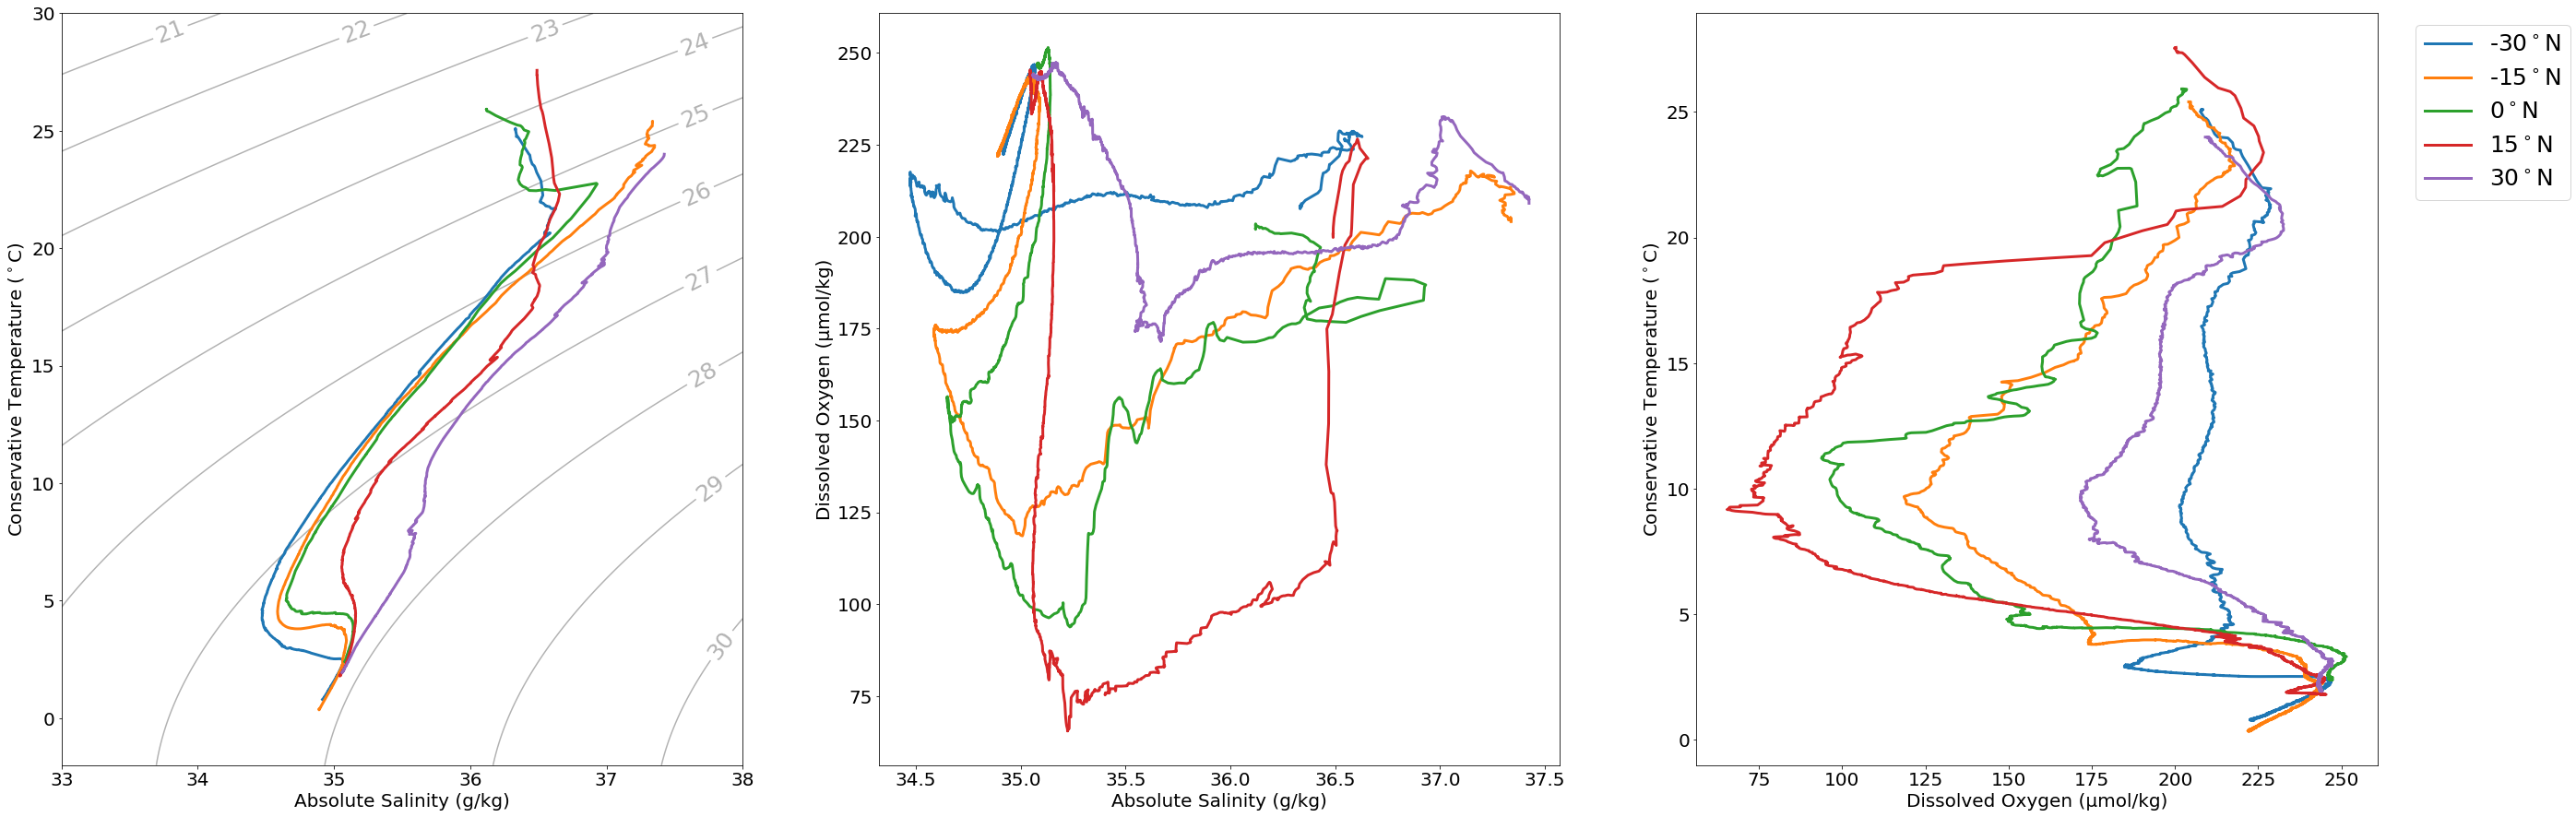

In [13]:
plot_TSO(latitude=[-30,-15,0,15,30])

## Figure 5: TS Histogram

In [14]:
SA_stacked = CTD_A11.SA.stack(i = ("press","lat"))
CT_stacked = CTD_A11.CT.stack(i = ("press","lat"))
# pythons bivariate histogram run time goes a bit crazy if we leave all the nan values in, here we drop them, 
# taking care that we keep datapoints with both a CT and SA measurement
SA_stacked = SA_stacked.where(np.abs(CT_stacked)>0)
CT_stacked = CT_stacked.where(np.abs(SA_stacked)>0)
SA_stacked = SA_stacked.where(np.abs(SA_stacked)>0, drop=True).values
CT_stacked = CT_stacked.where(np.abs(CT_stacked)>0, drop=True).values
print(SA_stacked.shape)
print(CT_stacked.shape)

(1144746,)
(1144746,)


In [15]:
tempvec=np.arange(-2,30.1,.1)
saltvec=np.arange(33,38.05,.05)

In [16]:
%%time
hist, saltedges, tempedges = np.histogram2d(SA_stacked, CT_stacked, bins=(saltvec, tempvec))
# get rid of zero values for logaruthmic scale
hist[hist==0]=np.nan
hist = hist.T

CPU times: user 98.1 ms, sys: 14.2 ms, total: 112 ms
Wall time: 114 ms


/Users/ruthmoorman/anaconda3/envs/oceanography/lib/python3.7/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


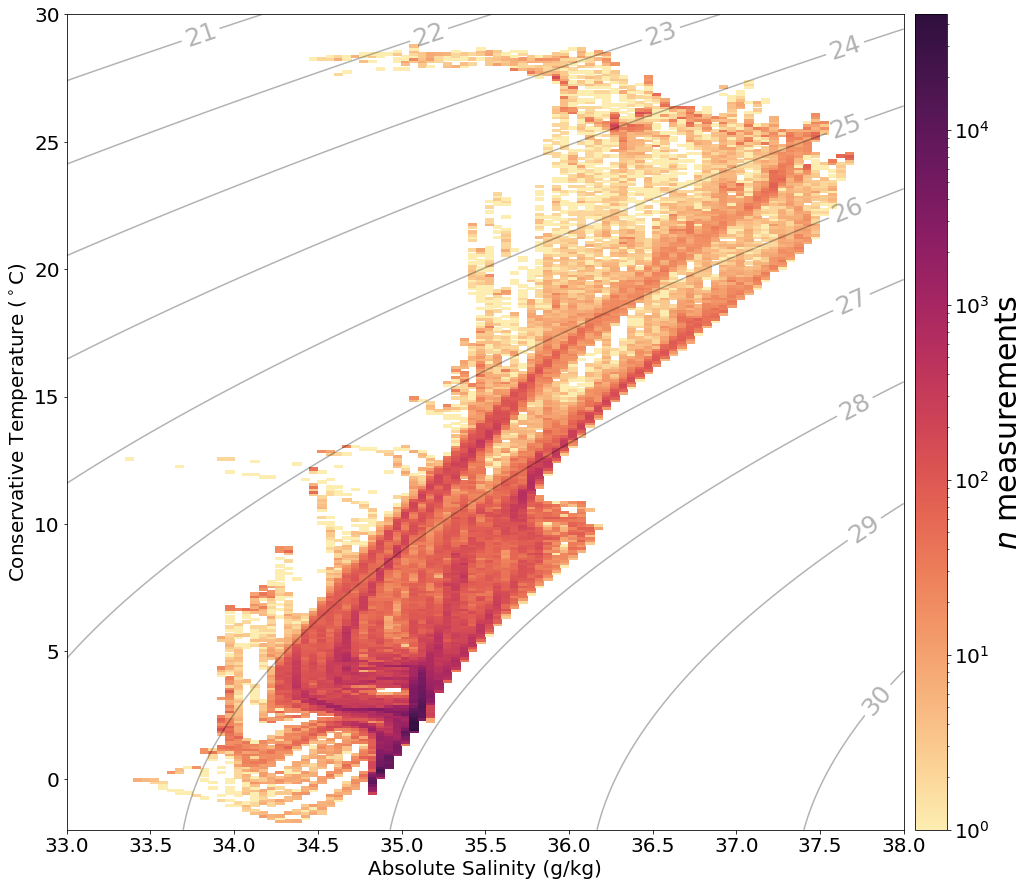

In [17]:
fig = plt.figure(figsize=[15, 15])
ax = plt.subplot()
saltmat,tempmat=np.meshgrid(saltvec,tempvec)
sigma0mat = sigma0(saltmat,tempmat)
cs=ax.contour(saltvec,tempvec,sigma0mat, levels=np.arange(20,31,1),colors='k',alpha=0.3)
ax.clabel(cs,fmt='%i',fontsize=25)
ax.set_xlabel('Absolute Salinity (g/kg)')
ax.set_ylabel('Conservative Temperature ($^\circ$C)')
ax.set_xticks(np.arange(33,38.5,.5))

n = ax.pcolormesh(saltedges, tempedges, hist, norm=colors.LogNorm(vmin=np.nanmin(hist), vmax=np.nanmax(hist)),cmap=cmo.matter)
cax = fig.add_axes([0.91, 0.125, 0.03, 0.755])
cbar=plt.colorbar(n,cax = cax,orientation='vertical',shrink = 0.5)
cbar.set_label(r'$n$ measurements', fontsize = 30)

plt.show()